In [1]:
import mapomatic as mm
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram

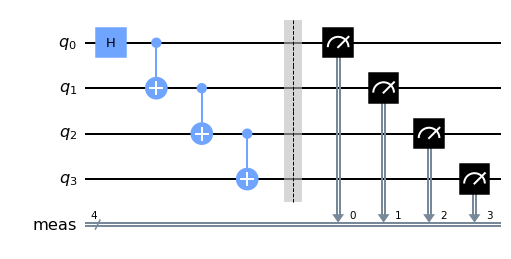

In [2]:
ghz=QuantumCircuit(4)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
ghz.cx(2,3)
ghz.measure_all()
ghz.draw('mpl')

### calibration : circuit gate -> pulse schedule

In [16]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian, GaussianSquare
from qiskit.providers.fake_provider import FakeKolkata

backend = FakeKolkata()

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))

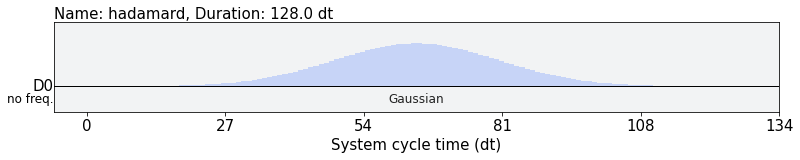

In [4]:
h_q0.draw()

In [14]:
ghz.calibrations

{'h': {((0,),
   ()): ScheduleBlock(Play(Gaussian(duration=128, sigma=16, amp=0.1, angle=0), DriveChannel(0)), name="hadamard", transform=AlignLeft())}}

In [19]:
with pulse.build(backend, name='ecr') as cr01:
    pulse.play(GaussianSquare(duration=1000, amp=0.1, sigma=20, width=20), pulse.drive_channel(0))

In [20]:
ghz.add_calibration('cx',[0,1], cr01)

In [8]:
ghz.add_calibration('h',[0], h_q0)

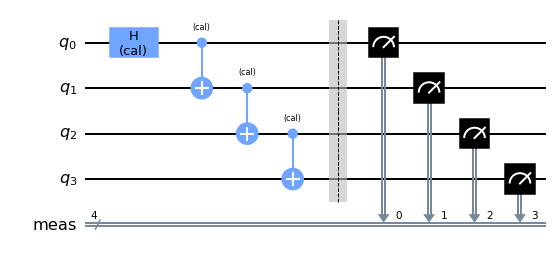

In [21]:
ghz.draw('mpl')